In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [0]:
# Reading/Importing the dataset into work environment 
df= pd.read_csv("/content/drive/My Drive/capstone/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [0]:
# Converting datatype of categorical variable

In [0]:
df['Month']=df['Month'].astype('category')
df['OperatingSystems']=df['OperatingSystems'].astype('category')
df['Browser']=df['Browser'].astype('category')
df['Region']=df['Region'].astype('category')
df['TrafficType']=df['TrafficType'].astype('category')
df['VisitorType']=df['VisitorType'].astype('category')

In [0]:
df['Weekend']=df['Weekend'].astype('bool')
df['Revenue']=df['Revenue'].astype('bool')

In [0]:
# Creating seperate dataframe of numerical & categorical variable
df_num=df.select_dtypes(include=['int64','float64'])
df_catg=df.select_dtypes(include=['category'])
df_bool=df.select_dtypes(include=['bool'])

In [0]:
df_bool.head()

,Weekend,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False


In [0]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0


In [0]:
df_catg.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,Feb,1,1,1,1,Returning_Visitor
1,Feb,2,2,1,2,Returning_Visitor
2,Feb,4,1,9,3,Returning_Visitor
3,Feb,3,2,2,4,Returning_Visitor
4,Feb,3,3,1,4,Returning_Visitor


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
df_catg_dummy=df_catg.apply(le.fit_transform)
df_catg_dummy.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,2,0,0,0,0,2
1,2,1,1,0,1,2
2,2,3,0,8,2,2
3,2,2,1,1,3,2
4,2,2,2,0,3,2


In [0]:
df_bool["Weekend"]=df_bool["Weekend"].map({False:0,True:1})
df_bool["Revenue"]=df_bool["Revenue"].map({False:0,True:1})

In [0]:
df_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 2 columns):
Weekend    12330 non-null int64
Revenue    12330 non-null int64
dtypes: int64(2)
memory usage: 192.7 KB


In [0]:
df_ss=pd.concat([df_num,df_catg_dummy],axis=1)
df_ss=pd.concat([df_ss,df_bool],axis=1)
df_ss.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,0,0,0,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,1,1,0,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,3,0,8,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,1,1,3,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,2,2,0,3,2,1,0


In [0]:
df_ss.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,1.124006,1.357097,2.147364,3.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,7.000000,2.000000,1.000000,3.000000,3.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,7.000000,12.000000,8.000000,19.000000,2.000000,1.000000,1.000000


In [0]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int64
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null int64
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: float

# Assumptions of Logistic Regression

The logistic regression method assumes that:

1.  The outcome is a binary or dichotomous variable like yes vs no, positive vs negative, 1 vs 0.

2.  There is a linear relationship between the logit of the outcome and each predictor variables. Recall that the logit function is logit(p) = log(p/(1-p)), where p is the probabilities of the outcome.

3.   There is no influential values (extreme values or outliers) in the continuous predictors

4.   There is no high intercorrelations (i.e. multicollinearity) among the predictors.


To improve the accuracy of your model, you should make sure that these assumptions hold true for your data.

# Checking the Assumptions 

## 1) Given Dataset is for binary classification . Hence first assumption hold true.

## 2) Checking Multi collinearity & Removing highly correlated values.

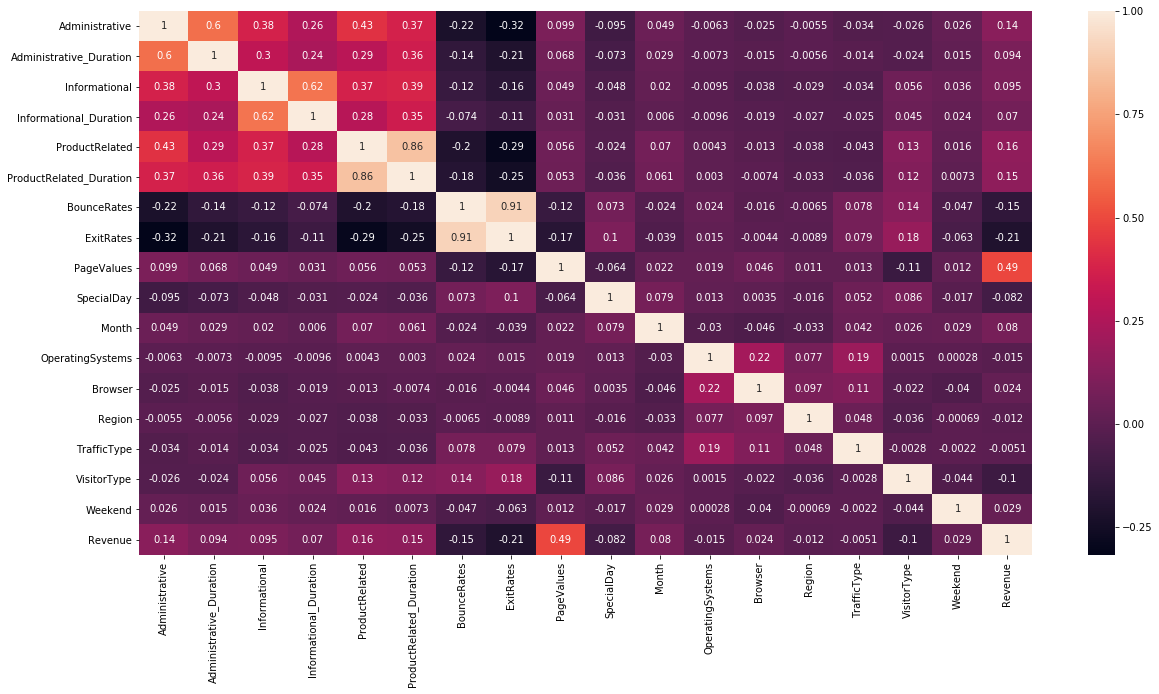

In [0]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_ss.corr(),annot = True)

In [0]:
df_ss.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.126656,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


In [0]:
df_ss1 = df_ss.drop(['ExitRates','ProductRelated'],1)

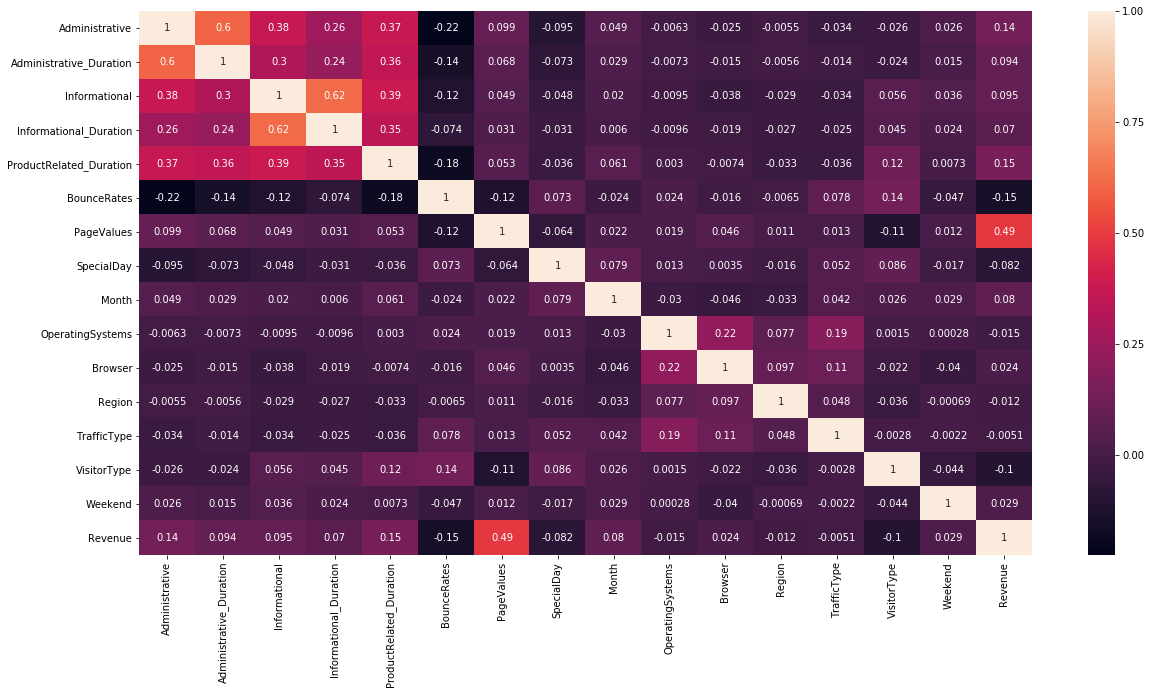

In [0]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_ss1.corr(),annot = True)

In [0]:
df_ss1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

# Checking influencial values in continious independent Variable .

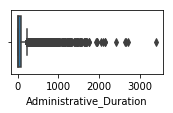

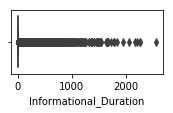

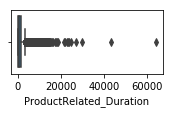

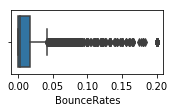

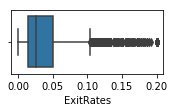

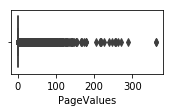

In [0]:
plt.subplot(321)
sns.boxplot(x = df['Administrative_Duration'])
plt.show()

plt.subplot(322)
sns.boxplot(x = df['Informational_Duration'])
plt.show()

plt.subplot(323)
sns.boxplot(x = df['ProductRelated_Duration'])
plt.show()

plt.subplot(324)
sns.boxplot(x = df['BounceRates'])
plt.show()

plt.subplot(325)
sns.boxplot(x = df['ExitRates'])
plt.show()

plt.subplot(326)
sns.boxplot(x = df['PageValues'])
plt.show()

### Box plot shows there are influential values but these are acceptable value for domains. Hence it is accepted and taken into dataset

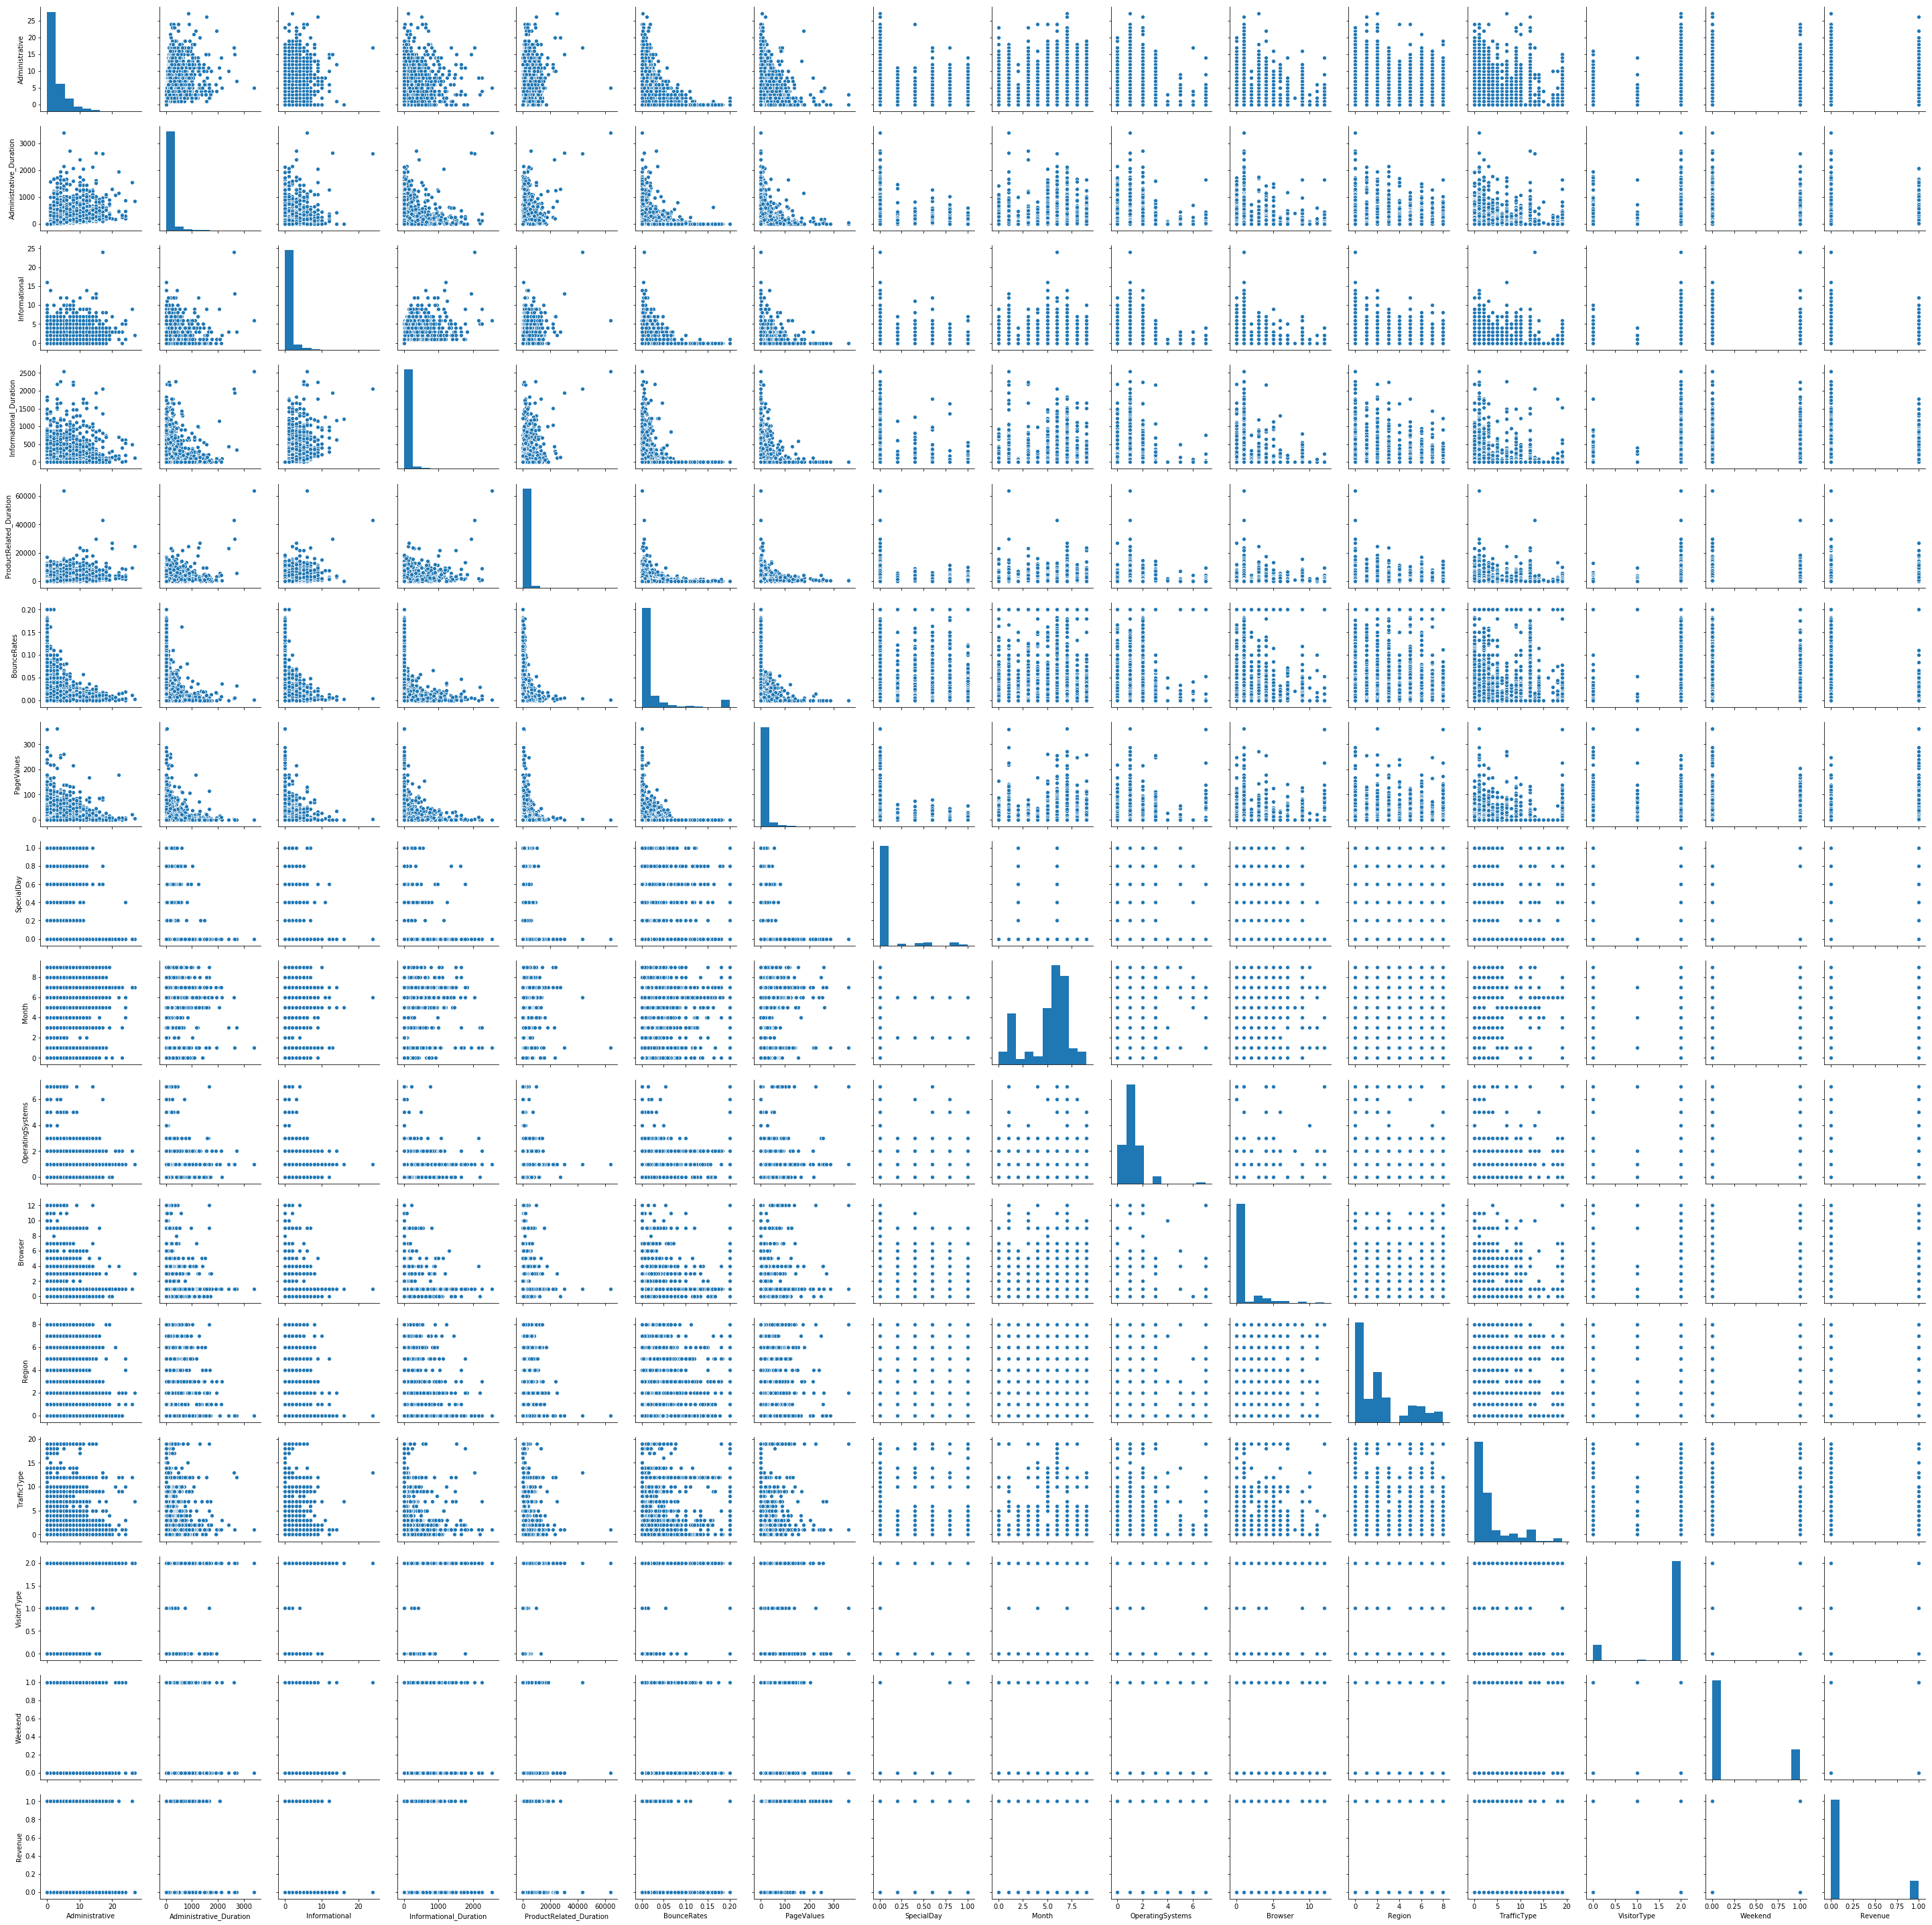

In [0]:
sns.pairplot(df_ss1)

In [0]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

In [0]:
df_ss=trans.fit_transform(df_ss1)
df_ss=pd.DataFrame(df_ss,columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'])

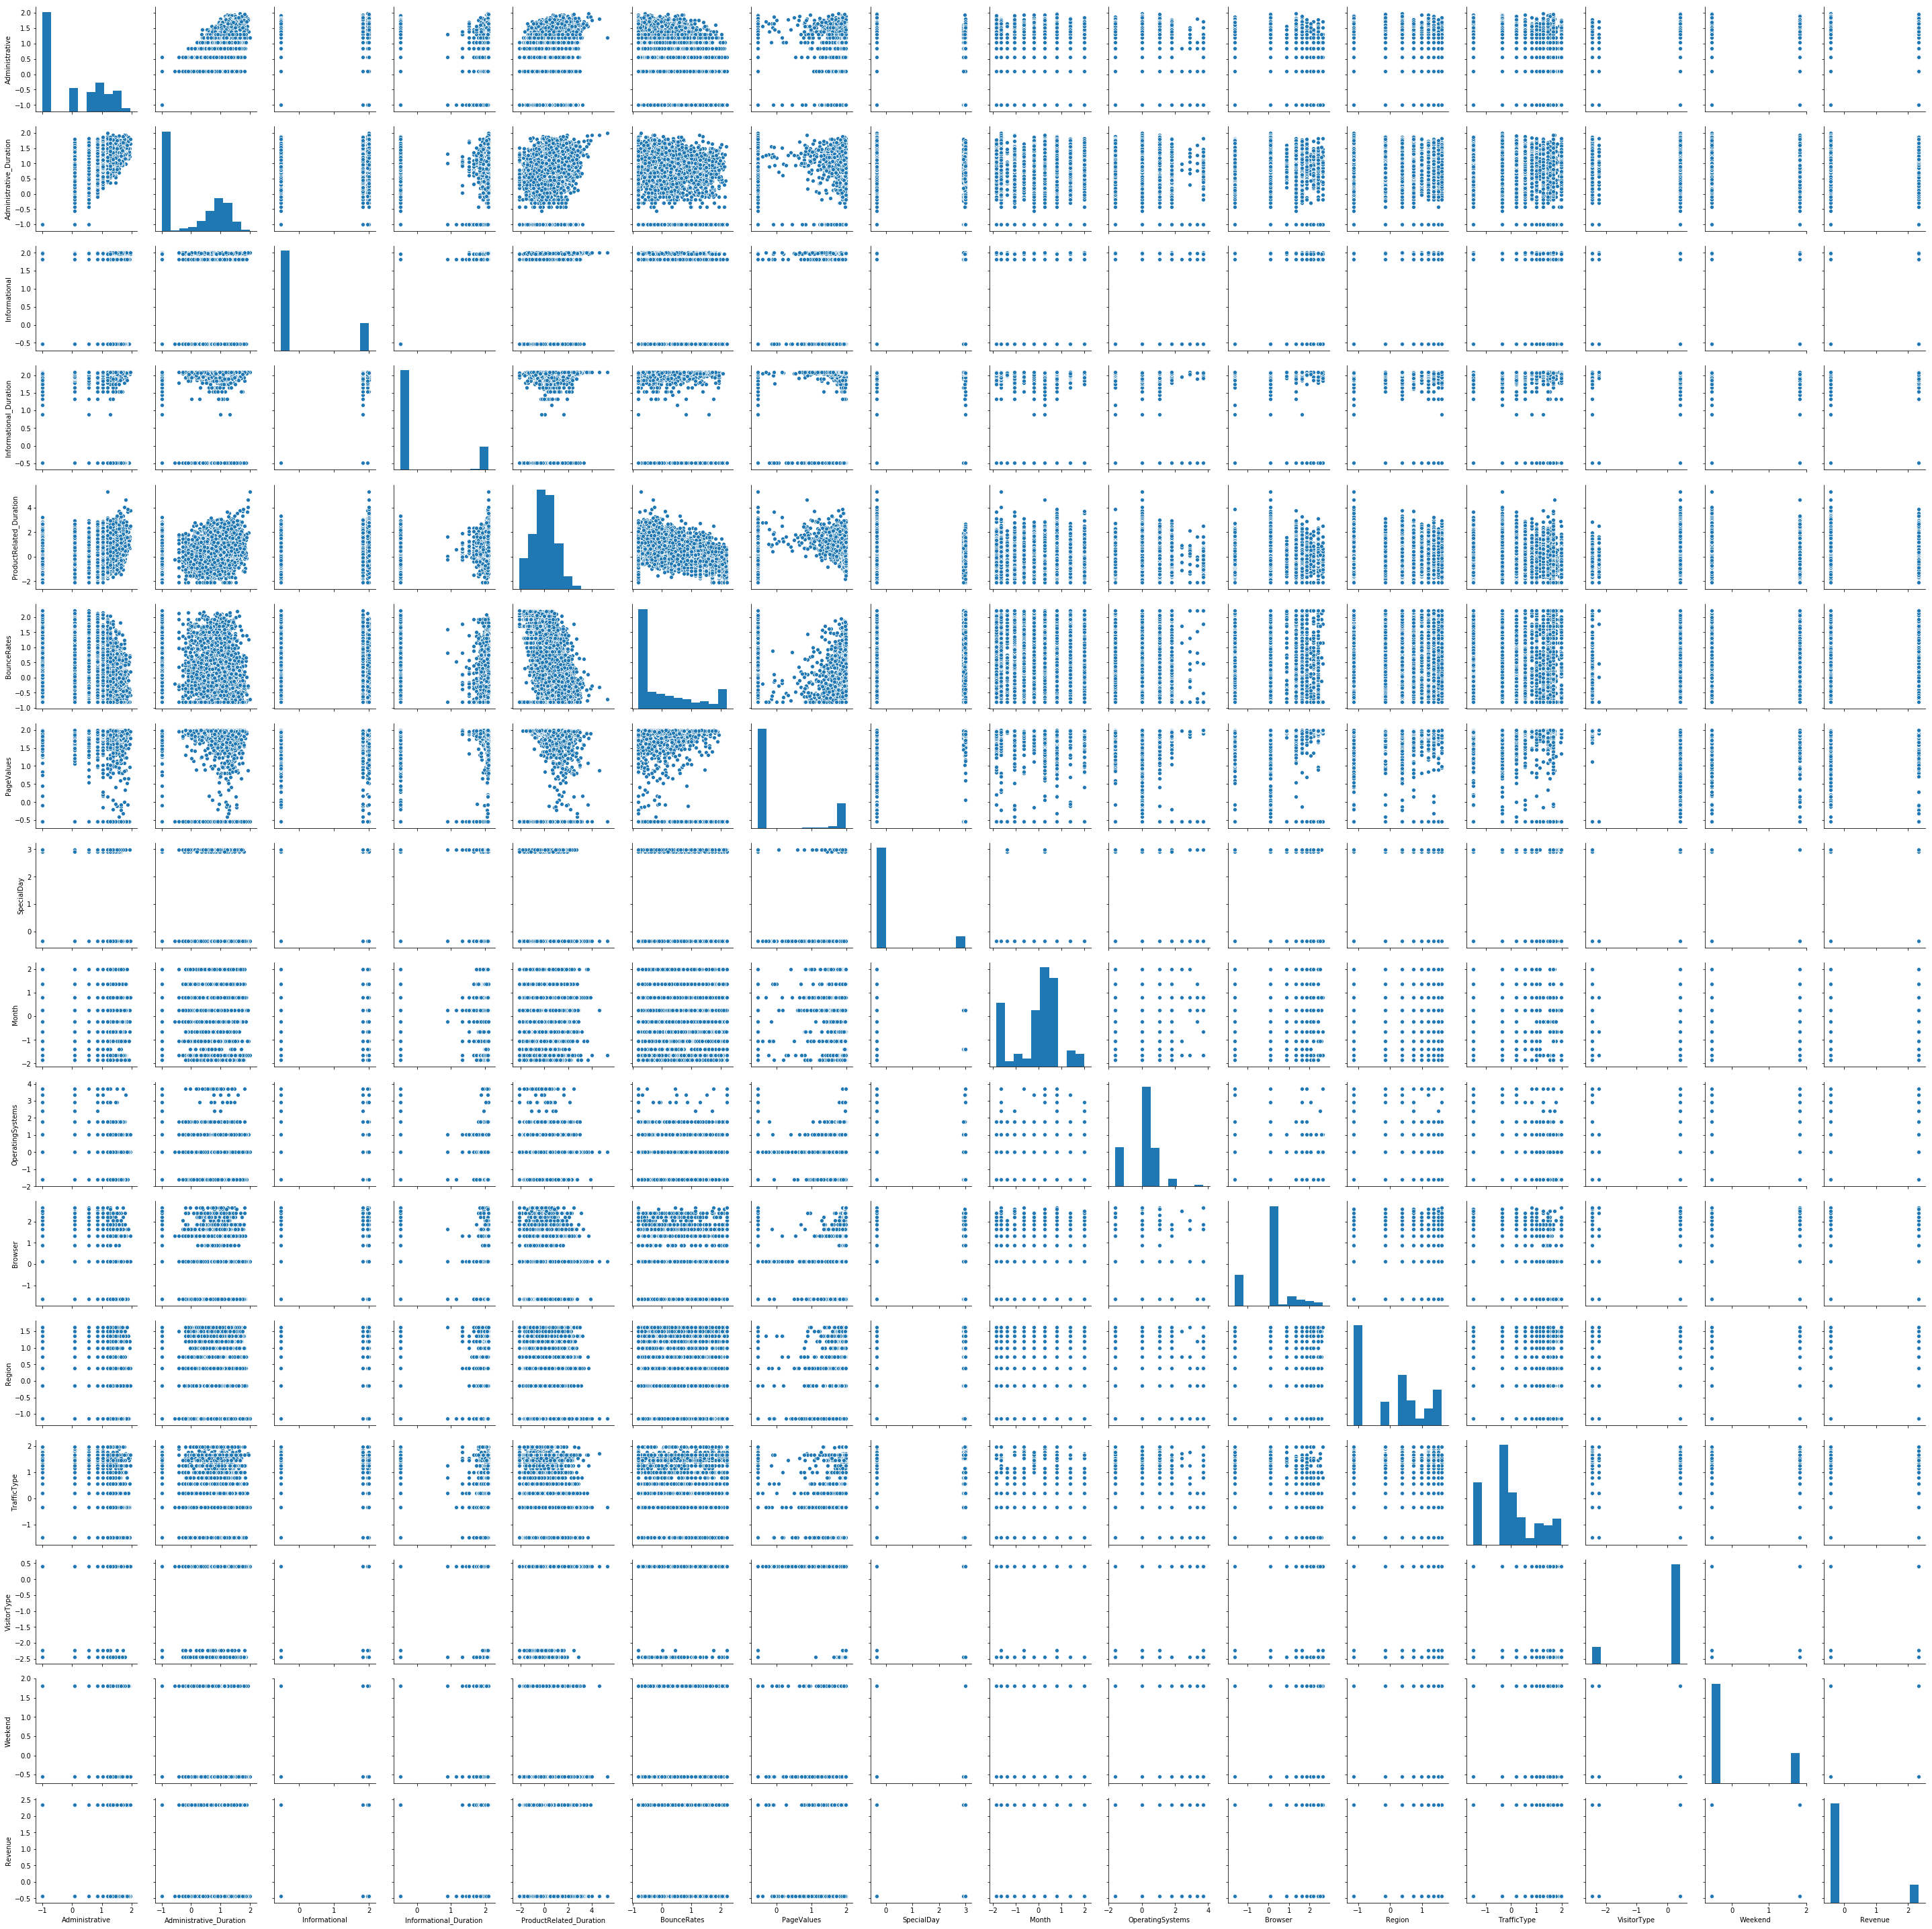

In [0]:
sns.pairplot(df_ss)

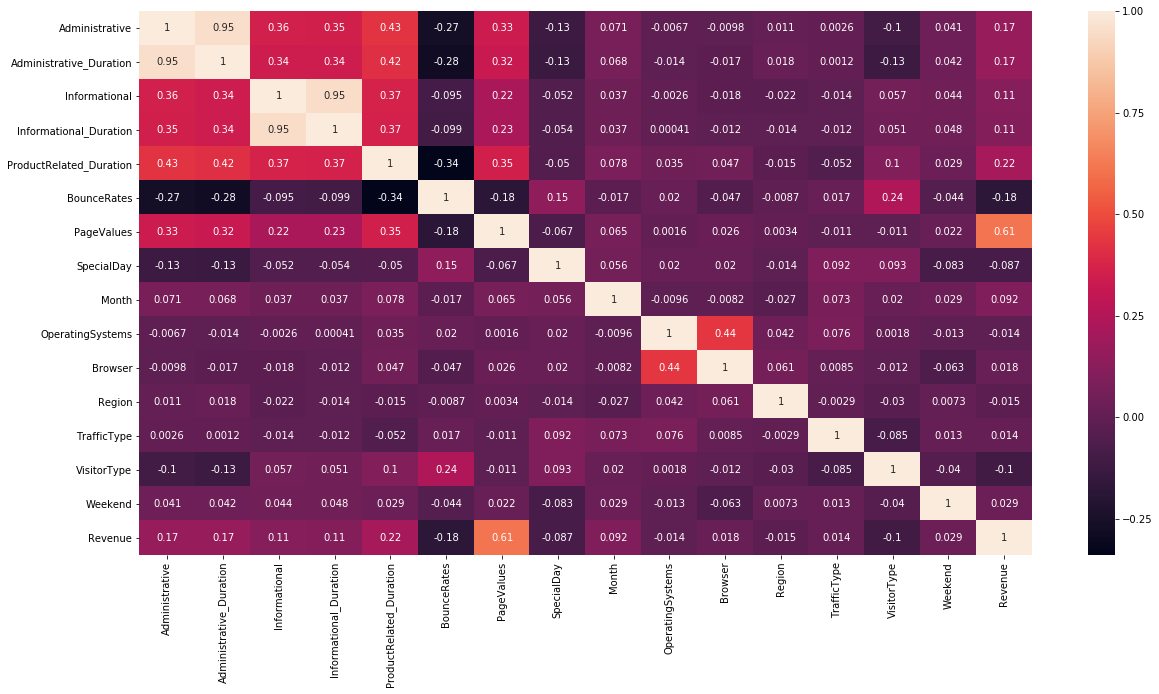

In [0]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_ss.corr(),annot = True)

In [0]:
# Seperating Independent and Target Variable ( standardized data)
X=df_ss.drop('Revenue',axis=1)
y=df_bool["Revenue"]

In [0]:
smt = SMOTE()
X_sm, y_sm = smt.fit_sample(X,y)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,train_size=0.7,random_state=100)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
lgr= LogisticRegression()
lgr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicted probabilities
y_pred = lgr.predict_proba(X_test)

In [0]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [0]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [0]:
y_pred_1.head()

,1
0,0.062598
1,0.448592
2,0.323503
3,0.048100
4,0.884774


In [0]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [0]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [0]:
y_pred_final.head()

,0,1
0,0,0.062598
1,0,0.448592
2,1,0.323503
3,0,0.048100
4,1,0.884774


In [0]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Probability', 0: 'Actual'})

In [0]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Actual,Probability
0,0,0.062598
1,0,0.448592
2,1,0.323503
3,0,0.048100
4,1,0.884774


In [0]:
# Creating new column 'predicted' with 1 if predicted probability>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Probability.map( lambda x: 1 if x > 0.5 else 0)

In [0]:
# Let's see the head
y_pred_final.head()

,Actual,Probability,predicted
0,0,0.062598,0
1,0,0.448592,0
2,1,0.323503,0
3,0,0.048100,0
4,1,0.884774,1


# Model Evaluation

In [0]:
cr_LR=metrics.classification_report(y_pred_final.Actual,y_pred_final.predicted)
print(cr_LR)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3179
           1       0.87      0.81      0.84      3075

    accuracy                           0.84      6254
   macro avg       0.85      0.84      0.84      6254
weighted avg       0.85      0.84      0.84      6254



In [0]:
cm = metrics.confusion_matrix( y_pred_final.Actual, y_pred_final.predicted )
cm

array([[2799,  380],
       [ 590, 2485]])

In [0]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

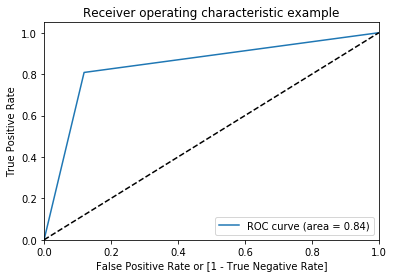

(array([0.        , 0.11953444, 1.        ]),
 array([0.        , 0.80813008, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_pred_final.Actual, y_pred_final.predicted)

In [0]:
# Optimal Cutoff point

In [0]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Probability.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Actual,Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062598,0,1,0,0,0,0,0,0,0,0,0
1,0,0.448592,0,1,1,1,1,1,0,0,0,0,0
2,1,0.323503,0,1,1,1,1,0,0,0,0,0,0
3,0,0.048100,0,1,0,0,0,0,0,0,0,0,0
4,1,0.884774,1,1,1,1,1,1,1,1,1,1,0


In [0]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Actual, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.491685  0.000000  1.000000
0.1   0.1  0.640070  0.310160  0.981138
0.2   0.2  0.785098  0.635420  0.939837
0.3   0.3  0.834666  0.804656  0.865691
0.4   0.4  0.842980  0.863165  0.822114
0.5   0.5  0.844899  0.880466  0.808130
0.6   0.6  0.844899  0.888959  0.799350
0.7   0.7  0.835625  0.893363  0.775935
0.8   0.8  0.815798  0.911607  0.716748
0.9   0.9  0.710106  0.961309  0.450407


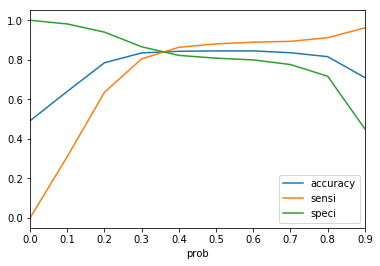

In [0]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [0]:
y_pred_final['final_predicted'] = y_pred_final.Probability.map( lambda x: 1 if x > 0.4 else 0)

In [0]:
#Let's check the overall accuracy.
cr_LR_final=metrics.classification_report(y_pred_final.Actual,y_pred_final.final_predicted)
print(cr_LR_final)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3179
           1       0.81      0.87      0.84      3075

    accuracy                           0.83      6254
   macro avg       0.84      0.84      0.83      6254
weighted avg       0.84      0.83      0.83      6254



In [0]:
metrics.confusion_matrix( y_pred_final.Actual, y_pred_final.final_predicted )

array([[2670,  509],
       [ 504, 2571]])

In [0]:
lgr.coef_ 

array([[ 0.14227311, -0.27731072,  0.26530771, -0.26840788,  0.33734526,
        -0.37865988,  1.44468776, -0.38479303,  0.35529447, -0.07948323,
        -0.00306522, -0.08694757,  0.04050605, -0.26899943,  0.00633515]])

In [0]:
odd_ratio=pd.DataFrame(data=np.exp(lgr.coef_ ),columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend']).T

In [0]:
odd_ratio

,0
Administrative,1.152891
Administrative_Duration,0.757819
Informational,1.303832
Informational_Duration,0.764596
ProductRelated_Duration,1.401223
BounceRates,0.684778
PageValues,4.240528
SpecialDay,0.680591
Month,1.426601
OperatingSystems,0.923594
